In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, interact, interact_manual
from IPython.display import Image, display, HTML
import matplotlib.ticker as ticker
import mpld3
%matplotlib inline

In [2]:
employee_demo = pd.read_csv('data/General_Government_Employees_Demographics.csv')

In [3]:
employee_demo.head()

,Pay Grade/Step,Annual Salary,Class,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
0,MAC08B,41968.43,10236,Headstart Teacher 2,Metro Action Commission,Full Time,2,Professionals,F,1,White (Not of Hispanic Origin),1986,10/29/2012,N,DAVIDSON
1,OR0700,76613.61,10108,Finance Admin,Finance,Full Time,2,Professionals,F,1,White (Not of Hispanic Origin),1972,10/29/2012,Y,MAURY
2,CO0204,43297.89,6982,Correctional Officer 1,Sheriff,Full Time,4,Protective Service Workers,M,1,White (Not of Hispanic Origin),1986,11/01/2012,N,RUTHERFORD
3,ST0903,45786.11,7241,Admin Asst,Sheriff,Full Time,6,Administrative Support,F,1,White (Not of Hispanic Origin),1989,11/01/2012,N,RUTHERFORD
4,CO0303,45786.11,6981,Correctional Officer 2,Sheriff,Full Time,4,Protective Service Workers,M,1,White (Not of Hispanic Origin),1980,11/01/2012,N,SUMNER


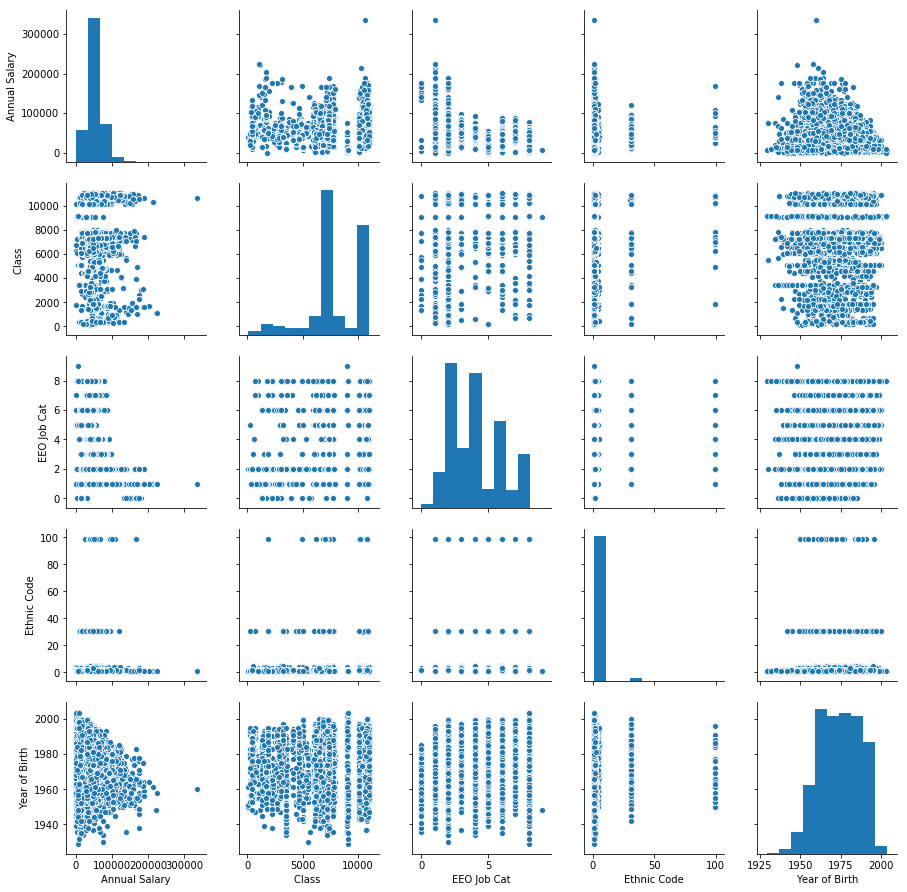

In [4]:
sns.pairplot(employee_demo)

In [5]:
title_count = employee_demo['Title'].value_counts()

In [6]:
race_count = employee_demo['Ethnic Code Description'].value_counts()

In [7]:
race_count

White (Not of Hispanic Origin)    6224
Black                             2572
Hispanic                           229
Two or More Races                  195
Asian                               85
Unknown                             29
American Indian/Alaskan Native      22
Hawaiian or Pacific Islander         3
Name: Ethnic Code Description, dtype: int64

In [8]:
lower_income_range = employee_demo.where(employee_demo['Annual Salary']<33000).dropna()

In [9]:
middle_income_range = employee_demo.where((employee_demo['Annual Salary']>33000) & (employee_demo['Annual Salary']<66000)).dropna()

In [10]:
upper_income_range = employee_demo.where(employee_demo['Annual Salary']>66000).dropna()

In [11]:
lower_income_range.head()

,Pay Grade/Step,Annual Salary,Class,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
23,SP0100,10191.64,3445.0,School Crossing Guard,Police,Part Time,4.0,Protective Service Workers,F,2.0,Black,1951.0,10/03/2016,N,DAVIDSON
26,NS,9327.55,7243.0,Admin Svcs Officer 2,Sheriff,Part Time,2.0,Professionals,M,1.0,White (Not of Hispanic Origin),1954.0,11/26/2012,N,WILLIAMSON
29,ST0705,19638.53,6880.0,Recreation Leader,Parks,Part Time,5.0,Para-Professional,F,1.0,White (Not of Hispanic Origin),1963.0,11/30/2012,N,DAVIDSON
31,ST0902,22172.80,10119.0,Office Support Mgr,Justice Integration Services,Part Time,6.0,Administrative Support,F,1.0,White (Not of Hispanic Origin),1983.0,05/31/2017,N,DAVIDSON
102,TG0502,31940.25,10848.0,Maintenance & Repair Worker,Parks,Full Time,8.0,Service Maintenance,M,2.0,Black,1989.0,04/22/2017,N,DAVIDSON


In [12]:
middle_income_range.head()

,Pay Grade/Step,Annual Salary,Class,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
0,MAC08B,41968.43,10236.0,Headstart Teacher 2,Metro Action Commission,Full Time,2.0,Professionals,F,1.0,White (Not of Hispanic Origin),1986.0,10/29/2012,N,DAVIDSON
2,CO0204,43297.89,6982.0,Correctional Officer 1,Sheriff,Full Time,4.0,Protective Service Workers,M,1.0,White (Not of Hispanic Origin),1986.0,11/01/2012,N,RUTHERFORD
3,ST0903,45786.11,7241.0,Admin Asst,Sheriff,Full Time,6.0,Administrative Support,F,1.0,White (Not of Hispanic Origin),1989.0,11/01/2012,N,RUTHERFORD
4,CO0303,45786.11,6981.0,Correctional Officer 2,Sheriff,Full Time,4.0,Protective Service Workers,M,1.0,White (Not of Hispanic Origin),1980.0,11/01/2012,N,SUMNER
5,CO0303,45786.11,6981.0,Correctional Officer 2,Sheriff,Full Time,4.0,Protective Service Workers,F,2.0,Black,1984.0,11/01/2012,N,DAVIDSON


In [13]:
upper_income_range.head()

,Pay Grade/Step,Annual Salary,Class,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
1,OR0700,76613.61,10108.0,Finance Admin,Finance,Full Time,2.0,Professionals,F,1.0,White (Not of Hispanic Origin),1972.0,10/29/2012,Y,MAURY
22,OR0900,86354.83,6531.0,Human Resources Mgr,Public Library,Full Time,2.0,Professionals,F,2.0,Black,1962.0,11/19/2012,Y,SUMNER
25,OR0800,80461.68,10865.0,Assistant Public Defender 2,Public Defender,Full Time,2.0,Professionals,M,1.0,White (Not of Hispanic Origin),1980.0,12/03/2012,Y,DAVIDSON
32,OR0700,89169.88,7242.0,Admin Svcs Mgr,Public Defender,Full Time,1.0,Officials and Administrators,F,1.0,White (Not of Hispanic Origin),1960.0,12/17/2012,Y,DAVIDSON
75,OR1100,115195.34,7744.0,Info Systems Asst Dir,Information Technology Service,Full Time,1.0,Officials and Administrators,F,3.0,Hispanic,1961.0,12/26/2012,Y,WILSON


In [14]:
lower_income_race_count = lower_income_range['Ethnic Code Description'].value_counts()

In [15]:
middle_income_race_count = middle_income_range['Ethnic Code Description'].value_counts()

In [16]:
upper_income_race_count = upper_income_range['Ethnic Code Description'].value_counts()

In [17]:
lower_income_race_count

White (Not of Hispanic Origin)    569
Black                             532
Hispanic                           18
Two or More Races                  15
Asian                              10
Unknown                             5
American Indian/Alaskan Native      1
Name: Ethnic Code Description, dtype: int64

In [18]:
middle_income_race_count

White (Not of Hispanic Origin)    3909
Black                             1697
Hispanic                           186
Two or More Races                  137
Asian                               54
Unknown                             20
American Indian/Alaskan Native      15
Hawaiian or Pacific Islander         2
Name: Ethnic Code Description, dtype: int64

In [19]:
upper_income_race_count

White (Not of Hispanic Origin)    1738
Black                              334
Two or More Races                   43
Hispanic                            25
Asian                               21
American Indian/Alaskan Native       6
Unknown                              4
Hawaiian or Pacific Islander         1
Name: Ethnic Code Description, dtype: int64

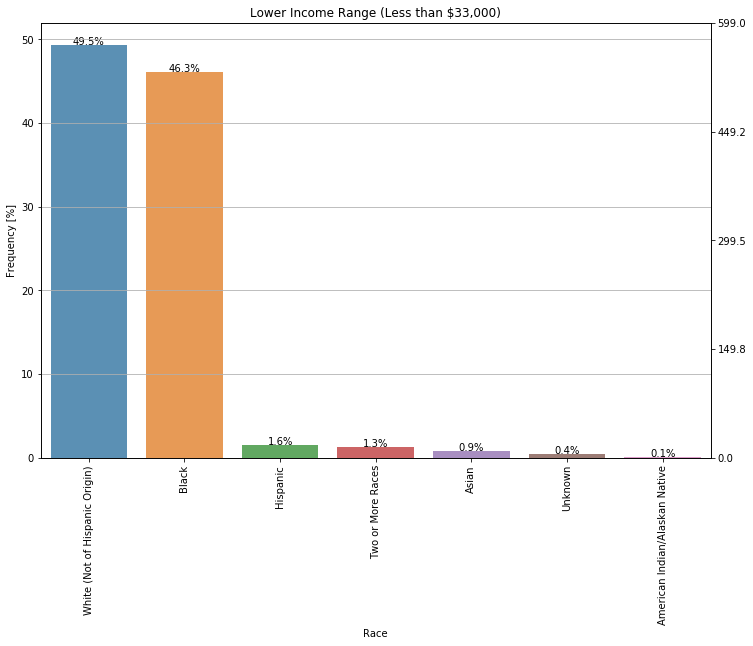

In [20]:
ncount = len(lower_income_range)

plt.figure(figsize=(12,8))
ax = sns.barplot(lower_income_race_count.index, lower_income_race_count.values, alpha=0.8)
plt.title('Lower Income Range (Less than $33,000)')
plt.xlabel('Race')
plt.xticks(rotation='vertical')
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*(y/ncount)), (x.mean(), y), 
            ha='center', va='baseline') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
ax.set_ylim(0,lower_income_race_count.values.max()+30)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

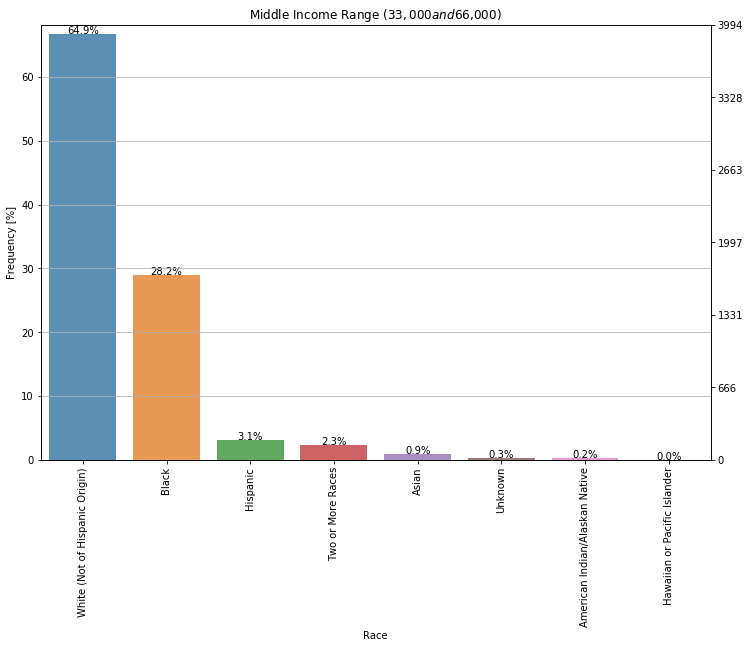

In [21]:
ncount = len(middle_income_range)

plt.figure(figsize=(12,8))
ax = sns.barplot(middle_income_race_count.index, middle_income_race_count.values, alpha=0.8)
plt.title('Middle Income Range ($33,000 and $66,000)')
plt.xlabel('Race')
plt.xticks(rotation='vertical')
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*(y/ncount)), (x.mean(), y), 
            ha='center', va='baseline') # set the alignment of the text


# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
ax.set_ylim(0,middle_income_race_count.values.max()+85)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

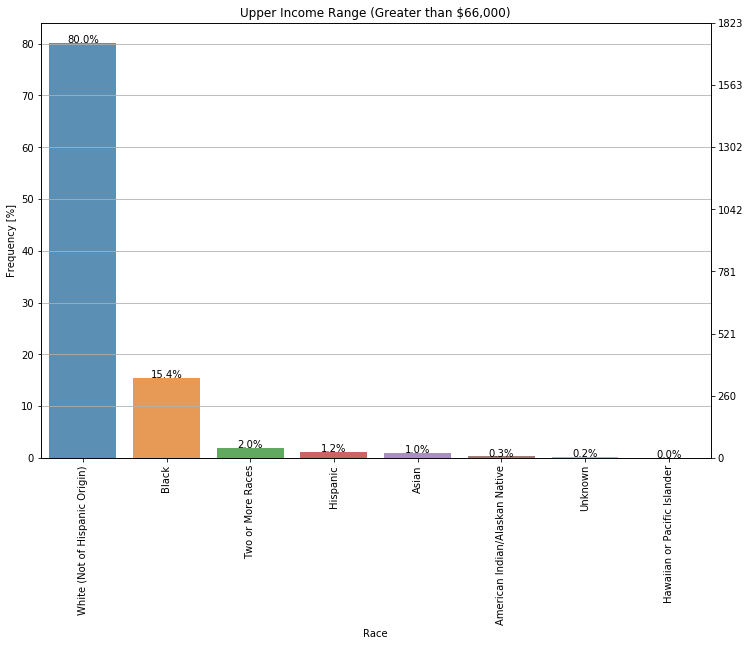

In [22]:
ncount = len(upper_income_range)

plt.figure(figsize=(12,8))
ax = sns.barplot(upper_income_race_count.index, upper_income_race_count.values, alpha=0.8)
plt.title('Upper Income Range (Greater than $66,000)')
plt.xlabel('Race')
plt.xticks(rotation='vertical')
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*(y/ncount)), (x.mean(), y), 
            ha='center', va='baseline') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(8))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
ax.set_ylim(0,upper_income_race_count.values.max()+85)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [25]:
title_count.head(50)

Police Officer 2                  965
Fire Fighter 2                    364
Police Sergeant                   235
Fire Engineer                     171
Fire Captain                      170
Paramedic 2                       165
Correctional Officer 2            140
Seasonal/Part-time/Temporary      139
Correctional Officer 1            138
Maintenance & Repair Worker       137
Office Support Rep 3              133
Emerg Medical Tech 2              129
School Crossing Guard             129
Police Officer Trainee            106
Recreation Leader                 104
Public Health Nurse 1             104
Satellite position                103
Equipment Operator Senior         102
Teacher Asst                       92
Admin Svcs Officer 3               91
Office Support Spec 2              81
Headstart Teacher 2                74
Admin Svcs Mgr                     71
Circulation Asst 2                 68
Office Support Spec 1              67
Admin Asst                         67
Police Lieut

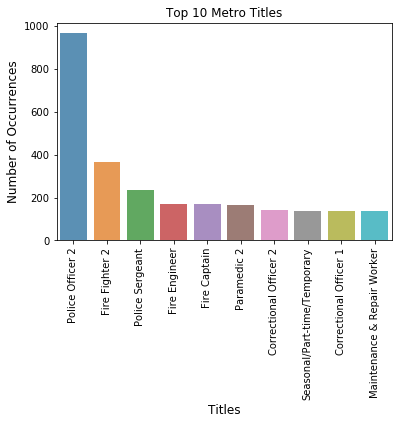

In [24]:
#The top 10 titles
top_title_count = title_count[:10,]
sns.barplot(top_title_count.index, top_title_count.values, alpha=0.8)
plt.title('Top 10 Metro Titles')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Titles', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()